In [1]:
import pandas as pd

# Path to the dataset
file_path = 'C:/Users/KIIT0001/Desktop/churn_prediction/Churn_Modelling.csv'

# Reading the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [2]:
print(data.shape)

(10000, 14)


In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()
#for checking is an any missing value in any column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.duplicated().sum()
#for checking is any duplicated row is present or not 

0

In [6]:
data['Exited'].value_counts()
#check here how many people leave the bank 

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
data['Geography'].value_counts()
#for checking hown many categories under geometry

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
data['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [10]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
data = pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True)
#we make 2 columns out of 3 categories of geography and make 1 colims out of 2 gender

In [12]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [13]:
#now we sclaed the values for model building

X = data.drop(columns=['Exited'])
y = data['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [14]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [15]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [16]:
X_train.shape

(8000, 11)

In [17]:
#now we do scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
#here we get tranform values after running above code

X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [23]:
#now we are ready to apply keras 

import tensorflow
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [69]:
# now we are build seqeantial model

# Define the model
model = Sequential()

# Add layers
# First specify the input shape in the first layer
model.add(Dense(3, activation='sigmoid', input_shape=(11,)))  # 11 features in input layer
model.add(Dense(1, activation='sigmoid'))  # output layer


'''model.add(Dense(11, activation='relu', input_shape=(11,)))  # 11 features in input layer
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # output layer'''

# This approach follows the TensorFlow's best practices for defining input layers


c:\Users\KIIT0001\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


"model.add(Dense(11, activation='relu', input_shape=(11,)))  # 11 features in input layer\nmodel.add(Dense(11, activation='relu'))\nmodel.add(Dense(1, activation='sigmoid'))  # output layer"

In [70]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [94]:
#Compile the model
#used to compile a TensorFlow model, specifying the loss function and optimizer
#Adam is an optimizer that is considered an extension to stochastic gradient descent. It has been very popular due to its effectiveness at handling sparse gradients on noisy problems.
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

#model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [95]:
#is a function call to train a TensorFlow Keras model
#model.fit(): This is the method used to train the model. It involves feeding the training data to the model, allowing it to learn from the data by adjusting weights to minimize the loss function
history=model.fit(X_train_scaled,y_train,epochs=10,validation_split=0.2)

#history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8358 - loss: 0.4062 - val_accuracy: 0.8225 - val_loss: 0.4180
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8318 - loss: 0.4116 - val_accuracy: 0.8231 - val_loss: 0.4173
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8295 - loss: 0.4149 - val_accuracy: 0.8244 - val_loss: 0.4168
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8324 - loss: 0.4113 - val_accuracy: 0.8263 - val_loss: 0.4164
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8341 - loss: 0.4105 - val_accuracy: 0.8269 - val_loss: 0.4158
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8241 - loss: 0.4244 - val_accuracy: 0.8256 - val_loss: 0.4156
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8290 - loss: 0.4173 - val_accuracy: 0.8269 - val_loss: 0.4150
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8355 - loss: 0.4078 - val_accuracy: 0.

In [96]:
model.layers[0].get_weights()
#it is used to retrieve the weights from the first layer of a trained TensorFlow Keras model.

[array([[-1.7517233e-01,  2.0067292e-01, -1.2747521e-03],
        [ 2.0966386e-02, -7.5593442e-01, -2.7907715e+00],
        [-1.7195208e-01, -5.6061294e-02,  3.7295278e-02],
        [ 2.0672560e-01, -6.3413459e-01, -8.8895656e-02],
        [-1.9231242e-01,  8.1222527e-02, -1.0671756e-02],
        [-2.2425147e-02, -4.5520078e-02,  9.9521838e-02],
        [-1.5951447e+00,  1.2107105e+00, -1.7927092e-01],
        [ 1.7510751e-01, -7.1623556e-02,  3.4617364e-02],
        [ 9.9812055e-01, -4.1595069e-01, -1.6886155e-01],
        [ 4.2690140e-01,  2.1276832e-01,  8.7096117e-02],
        [-6.2404579e-01,  7.3872638e-01,  8.0347732e-02]], dtype=float32),
 array([-0.3221255,  0.6238802,  0.5222912], dtype=float32)]

In [97]:
model.layers[1].get_weights()
#it is used to retrieve the weights from the second layer of a trained TensorFlow Keras model.

[array([[ 1.3294443],
        [-0.7635221],
        [-2.3013716]], dtype=float32),
 array([-0.43365276], dtype=float32)]

In [98]:
model.predict(X_test_scaled)
#is used to make predictions with a TensorFlow Keras model using the provided input data, in this case, X_test_scaled

#What Happens During Prediction?
#Input Layer: The input data (X_test_scaled) is fed into the model.
#Hidden Layers: Each hidden layer processes the input using its learned weights and biases. This may involve various operations such as matrix multiplication, applying activation functions, etc.
#Output Layer: The final layer produces the output. The nature of the output (e.g., probabilities, direct class predictions, continuous values) depends on the configuration of the model (e.g., activation functions, number of neurons in the output layer).

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.18252568],
       [0.11009253],
       [0.15154195],
       ...,
       [0.04202072],
       [0.10456168],
       [0.37645647]], dtype=float32)

In [99]:
y_log = model.predict(X_test_scaled)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [100]:
import numpy as np

## Apply a threshold to convert probabilities to class labels
np.where(y_log > 0.5, 1, 0)


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [101]:
y_pred = np.where(y_log > 0.5, 1, 0)


In [102]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8295

In [103]:
import matplotlib.pyplot as plt

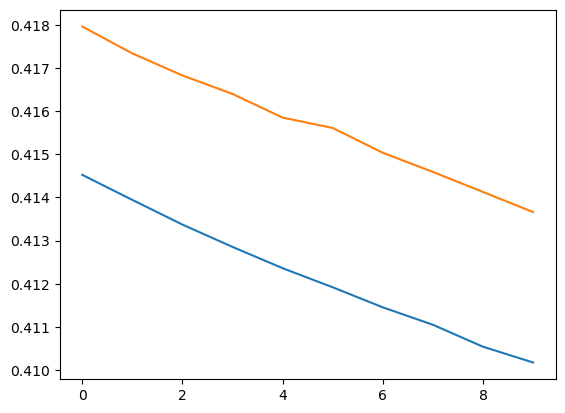

In [104]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

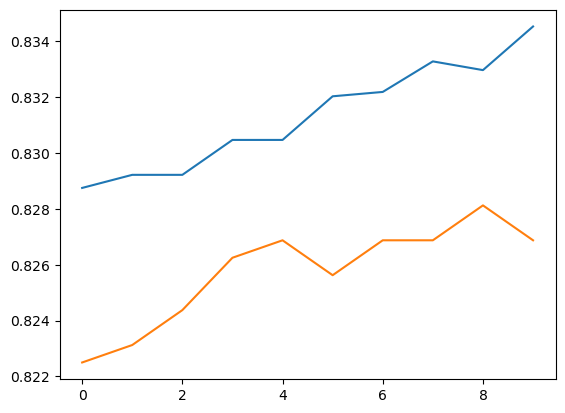

In [105]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])